# Programming for Data Science 2024

## Homework Assigment Three

Homework Assigment Three focus in the step-by-step implementation of a simple, yet popular, clustering algorithm, the K-Means. Although in most projects you will source algorithms from libraries such as scikit-learn or Keras, in other cases you will need to implement an algorithm yourself. For instance, if such algorithm is not available or if you want to tailor the algorithm to your problem. In that sense, learning to implement algorithms is an important part of your skillset.

This is an Individual assingment, students that are caught cheating will obtain a score of 0 points.<br>
The Homeworking Assignment Three is worth 10% of your final grade.

The submission package should correspond to a .zip archive (.rar files are not acceptable) with the following files:
1. Jupyter Notebook with the output of all the cells;
2. HTML print of your Jupyter Notebook;
3. All files outputed as part of the exercises.

The .zip archive filename should be student1ID_student2ID.

Your submission will be graded according to the following guidelines:
1. Execution (does your program does what is asked from the exercise?)
2. Objectivity (are you using the adequate libraries?)
3. Readibility of your code (that includes comments, naming of variables, supporting text, etc ...)

In some questions might require that you make critical decisions, or design choices. In such cases, you will be graded according also for your ability to justify and support your decisions.

<b>Comment your code properly, which includes naming your variables in a meaningful manner. Badly documented code will be penalized.</b>

Submission is done through the respective Moodle activity.
Deadline is November 2nd at 12:00. 
A penality of 1 point per day late will be applied to late deliveries, with a maximum of 5 days.

Please fill the following fields: <br> <br>
**Name**: Jorge Miguel Cordeiro <br>
**ID**: 20240594<br>

<br> 

**Name**: <br>
**ID**: <br>


## Clustering with K-Means

K-Means is one of the most popular "clustering" algorithms, which you perhaps are already familiar from the Data Mining curricular unit. K-means estimates the location of $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

The K-means Algorithm consists in an iterative process that is roughly as follows:
1. Choose value for K (number of clusters);
2. Initialize the locations of the centroids, which we can do by randomly select K points from your dataset as initial locations of the centroids;
3. Calculate distance of all other points to each of the K centroids;
4. Associate each point to the cluster of the closest centroid;
5. Update the centroid position, by computing the average coordinates of all points associated to each cluster;
6. Evaluate the average change in the centroids positions, as a measure of convergence (the algorithm is said to have converged to the solution when the positions of the centroids don't change more than a given tolerance threshold);
7. Repeat steps 3-6 until either the centroids no longer move more than a tolerance threshold or until you repeated these steps at least for specified number of iterations (niter)

The algorithm is thus parametized by the number of clusters (K), the maximum number of iterations (niter), and the tolerance threshold (tol).

### Step 1

Let us start by importing the necessary libraries to execute this homework. <br>
Import numpy, Scipy, and pandas using, respectively, the aliases np, sc, and pd.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc

It is important that we devise a strategy to test our code at each step, in order to assess if it performs as expected. To that end, we have split each step of the algorithm into different blocks, and we ask you to test each block against a simple scenario where the outcome is predictable and can be computed by hand. In some steps, however, we want to pass a more comprehensive dataset with similar properties to the real dataset that we will be working with.<br>

Such, test datasets try to create realistic conditions in which your algorithm is expected to work correctly, and for which we can also assess if the solution matches our expectation. This allows us to have a general understanding if the algorithm performs as expected in "real-world" conditions.<br>

For this homework we will resort to a dataset that contains two clearly distinct clusters. We generated the clusters by sampling points from two distinct gaussian distributions with different averages and same standard deviation. <br>
As such, our algorithm should be able to identify each cluster easily, and place the centroids close to the averages of the two distributions. <br>

Run the cell below to download, load the data into a numpy array, and visualize your Test dataset.<br>
You will run your algorithm implementation against this dataset as a proof of work.

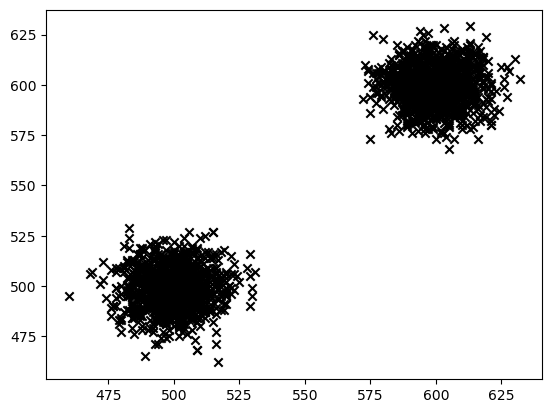

In [7]:


# download the file into a dataframes and convert it to a numpy array.
data_test = pd.read_csv("https://www.dropbox.com/s/gax1l68jsarxqt9/data_test.txt?dl=1", header=None).to_numpy()

#plot the points into a scatter plot
plt.scatter(data_test[:, 0], data_test[:,1], color ='k', marker='x')

<b>Optional Challenge:</b> Can you write a function that generates an artificial dataset for testing purposes?<br>
We will award one extra point for students that offer a good implementation.

**Consider leaving this challenge to the very end of the assignment**

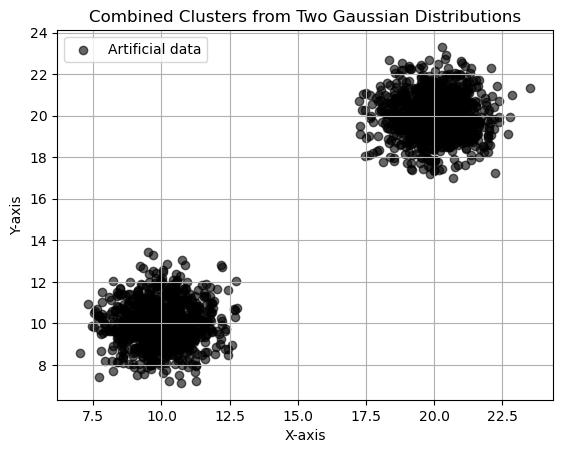

In [9]:
# Define mean positions for the two clusters
mean1, mean2 = [10, 10], [20, 20] 

# Define the standard deviation (same for both clusters)
std_dev = 1.0  
# Define the number of points in each cluster
num_points = 1000 


#Generate points for cluster 1 and 2 using a Gaussian distribution
#size=(num_points, 2) specifies the shape of the generated array. It means we want to generate 1000 random points, each with 2 coordinates, effectively creating a 2-dimensional dataset.
cluster1 = np.random.normal(mean1, std_dev, size=(num_points, 2)) 
cluster2 = np.random.normal(mean2, std_dev, size=(num_points, 2)) 

#np.random.normal() already generates NumPy arrays, but using np.array() helps ensure that we’re definitely working with a NumPy array
cluster1_array = np.array(cluster1) 
cluster2_array = np.array(cluster2) 

# cluster1_array and cluster2_array are two separate datasets, each representing a different Gaussian cluster
# vstack vertically concatenates multiple arrays along the row axis (axis=0)
#we end up with a combined dataset that contains both clusters.
combined_clusters = np.vstack((cluster1_array, cluster2_array)) 

#in a scatter plot, we need both the x and y coordinates for each point.
#combined_clusters[:, 0] extracts all values in the first column (x-coordinates)
#combined_clusters[:, 1] extracts all values in the second column (y-coordinates)
#alpha=0.6 controls the transparency of the points. A value of 0.6 means the points are slightly transparent.
plt.scatter(combined_clusters[:, 0], combined_clusters[:, 1], color='black', alpha=0.6,label='Artificial data')
plt.title('Combined Clusters from Two Gaussian Distributions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#Since we labeled the points as "Artificial data" earlier, this legend will use that label to indicate what the plotted points represent
plt.legend()
#This adds a grid to the plot
plt.grid(True)
plt.show()


### Step 2 

Write a function named <b>init</b> that takes two arguments: $points$ and $K$. <br>
The function <b>init</b> should return a numpy ndarray with  $K$ elements sampled randomly and without replacement from $points$. Meaning, the same point cannot picked up twice. <br>

**Show that your function performs as desired by calling it with** $K = 2$ **and use data_test as the** $points$

In [11]:
def init(points,K):
    #This gives the number of rows in the points array, which corresponds to the number of data points available
    #np.random.choice works with one-dimensional arrays, meaning it cannot select rows directly from a two-dimensional array (our dataset in this case)
    number_points = points.shape[0]
    #This function randomly selects K unique indices (without replacement) from the variable number_points
    #The argument replace=False ensures that each index is picked only once, which means a specific data point cannot be chosen more than once as a centroid.
    centroids = points[np.random.choice(number_points, K, replace=False)]
    return centroids
initial_centroids = init(data_test,2)
print(initial_centroids)

[[506 503]
 [612 590]]


### Step 3

Write a function named <b>distance</b> that takes two arguments: $p1$ and $p2$. <br>
The function <b>distance</b> should return a scalar that corresponds to the euclidean distance between points $p1$ and $p2$, that should have a ndarray format. <br> 
Assume that $p1$ and $p2$ are two ndarrays of the same size.

Recall that the euclidian distance (d) between two points ($p_1$ and $p_2$) in a 2-dimensional space is given by:<br><br>
\begin{equation}
    d(p_1, p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 }
\end{equation}<br>
where $p_1 = \{x_1,y_1\}$ and  $p_2 = \{x_2,y_2\}$. <br>


**1) Test that your function works by computing the distance between p1=(1,3) and p2=(7,2), which is $\approx$ 6.08.**<br>
**Consider using the existing Numpy or Scipy packages for this task.**

Can you write a function that computes the euclidean distance between two points of arbitrary dimension? <br>
In general, for arbitrary dimensionality the square of the distance can be computed as:<br><br>
\begin{equation}
    d^2(p_1, p_2) = \sum_{i=0}^{D-1} (x_i-y_i)^2
\end{equation}<br>
where $p_1 = \{x_1,x_2,...,x_{D-1}, x_D\}$ and $p_2 = \{y_1,y_2,...,y_{D-1},y_D\}$.<br>

**2) Show that your function works by computing the distance between (1,3,-9,12) and (7,2,0,5)**

***1)***

In [14]:
def distance(p1,p2):
    #np.linalg.norm calculates the "norm" (or length) of a vector.
    #when we do the operation (p1-p2) this will result in a new vector that represents the diffence between two points
    return np.linalg.norm(p1 - p2)


In [15]:
#Test variables, do not change the values
p1 = np.array([1,3])
p2 = np.array([7,2])

In [16]:
test_distance = distance(p1, p2)
test_distance

6.082762530298219

***2)***

In [18]:
#Test variables, do not change the values
p1 = np.array([1,3,-9,12])
p2 = np.array([7,2,0,5])

In [19]:
print(f'The distance between the 2 points is {round(distance(p1,p2),2)} .')

The distance between the 2 points is 12.92 .


### Step 4

Write a function <b>centroid_update</b> that takes two input arguments: <i>points</i> and <i>clusters</i><br> 
The argument <i>points</i> is a ndarray containing the coordinates of a set of points (1 point per row).
The argument <i>clusters</i> is a 1-dimensional ndarray that indicates the cluster to which each point is associated.
Note that values in <i>clusters</i> are integers and can only take values between 0 and K-1, where K is the number of clusters.

The function <b>centroid_update</b> should return an ndarray with the average coordinates of the points associated to each cluster, that is the centroid of each cluster. The returned array should have the same number of columns as points and length K.

**Test your function and report the centroids generated by passing p and c as inputs with k = 3. Save these centroids as a variable: cen**

In [21]:
def centroid_update(points, clusters):
    K = np.max(clusters) + 1  # number of clusters
    #Calculates the mean of the selected points along the columns (axis=0), which gives the average coordinates for that cluster (the centroid).
    #Selects all rows (points) from points that belong to cluster k. 
    return np.array([points[clusters == k].mean(axis=0) for k in range(K)])

In [22]:
# Tesst variables, do not change the values
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [23]:
cen = centroid_update(p, c)
print("Updated Centroids:\n", cen)

Updated Centroids:
 [[0.44995487 0.55986467]
 [0.53760985 0.53912646]
 [0.8922063  0.26672425]]


### Step 5

Write a function <b>points_update</b> that takes two input arguments: $points$ and $centroids$.<br>
The function <b>points_update</b> should return a one-dimensiona ndarray that indicates the index of the centroid that is closer to each point. To determine the distance between a centroid and a point you can use your distance function you created earlier. <br>

You will need to assess the distance between each point to each centroid. Different approaches can be taken to do this. For instance, you can start by computing a d by k distance matrix matrix between each of the $d$ points and the $k$ centroids.

**Test your function by calling it and passing the array p (as defined above) with the output of cupdate, cen, as arguments. You should get an output that looks like c defined above (but is not exactly the same, can you see why). Print this result and save it in a variable called new_clusters**

In [25]:
def points_update(points, centroids):

    # Empty list to store the index of the closest centroid for each point
    closest_centroids = []

    # Loop through each point in the dataset
    for point in points:
        # Calculate the distance from the current point to each centroid
        distances = [distance(point, centroid) for centroid in centroids]

        # Find the index of the centroid with the smallest distance (i.e., the closest centroid)
        closest_centroid = np.argmin(distances)

        # Append the index of the closest centroid to the list
        closest_centroids.append(closest_centroid)

    # Convert the list of closest centroids to a numpy array and return it
    return np.array(closest_centroids)

In [26]:
new_clusters = points_update(p, cen)
print("New Cluster Assignments:\n", new_clusters)

New Cluster Assignments:
 [2 0 0 1 2 0 1 1 0 0]


### Step 6

Write a function <b>error</b> that takes two input arguments: oldcentroids and newcentroids.<br>
The argument oldcentroids corresponds to a ndarray with centroid positions from the previous iteration, and newcentroids to a ndarray with the newly computed centroid positions from the current iteration. <br>

The function <b>error</b> should return the average euclidean distance between the old and new positions of each centroid. This will give us a quantity that tell us whether our algorithm is still converging to the solution or got to good approximation. We will use a tolerance threshold in the average change in the centroids positions to make this decision.

**Test your function then report the distance between the centroids calculated in Step 5, cen, and the centroids that you can calculate using the function cupdate with the arguments points and new_clusters.**

In [28]:
def error(oldcentroids, newcentroids):
    distances = np.linalg.norm(oldcentroids - newcentroids, axis=1) #Euclidean distance between old and new centroid positions
    return np.mean(distances) #return mean

In [29]:
updated_centroids = centroid_update(p, new_clusters)
centroid_distance = error(cen, updated_centroids)
centroid_distance

0.17635560837965428

### Step 7

Write a wrapper function called <b>kmeans</b> that takes the following arguments:
- $points$, which is a ndarray of points;
- $K$, the number of clusters, set the default value to two;
- $niter$, the number of iterations;
- $tol$, the error tolerance threshold below which your algorithm should stop

The function should return:
- A one dimensional ndarray with the cluster of associated to each point,
- A ndarray with the location of the K centroids.

Use the functions you prepared in the previous Steps to assemble the function <b>kmeans</b>. <br>
Use the tolerance as a treshold to stop the algorithm, for instance by evaluating if the average variation in the distance between the new and previous coordinates of the centroids is below the tolerance level. If yes, then you can stop the algorithm and return the outputs. <br>

You will need to make some decisions about the best approach to select the correct range of values to pass to init(). Explain how you did it.

**Note: A common issue with the K-means algorithm is that in some limiting conditions it might lead to empty clusters. In that case it is expected that your algorithm to return errors. Although that is not expected to happen with the examples provided, you might want to consider implementing some heuristics to overcome those errors. However, such is an optional task, and for this homework if you bump into such errors we recommend you try to rerun your code.**

In [31]:
def kmeans(points, K=2, niter=100, tol=0.0001):
    #  Centroids, random selecting K points from the data
    np.random.seed(0)  # For reproducibility - same results
    
    # This initializes the centroids by selecting K random points from the dataset using the init function.
    # It ensures we have an initial guess for the cluster centers to start the iterative process.
    centroids = init(points, K)
    
    for i in range(niter):
        #Each point in the dataset is assigned to the nearest centroid using the points_update function.
        #This creates an initial cluster assignment for all the points.
        clusters = points_update(points, centroids)
        
        #The centroids are updated by calculating the average coordinates of the points assigned to each cluster.
        #This is done with the centroid_update function, which calculates new cluster centers based on the points currently assigned to each cluster.
        new_centroids = centroid_update(points, clusters)
        
        #The error function calculates the average Euclidean distance between the old centroids and the newly updated centroids.
        #This gives us a measure of how much the centroids moved between iterations.
        avg_distance = error(centroids, new_centroids)

        #If the average distance (centroid movement) is less than the specified tolerance (tol), the algorithm assumes that it has converged.
        #This means that the centroids are no longer moving significantly, indicating that the clusters are stable, and the iteration can stop.
        if avg_distance < tol:
            break  # Stop if convergence is in tolerance level
        
        #If the centroids moved more than the threshold (tol), the new centroids are set as the current centroids.
        #Each point is then reassigned to the closest new centroid to update the clusters.
        centroids = new_centroids
    
    return clusters, centroids

In [32]:
clusters_result, centroids_result = kmeans(p, K=3, niter=100, tol=0.0001)
print("Final Cluster Assignments:\n", clusters_result)
print("Final Centroids:\n", centroids_result)

Final Cluster Assignments:
 [2 0 0 1 2 1 1 1 1 1]
Final Centroids:
 [[0.33864555 0.27450297]
 [0.49911422 0.71690757]
 [0.81022182 0.18605104]]


It is useful to visually inspect the results in order to assess the performance of the clustering algorthim. <br>
Below is an example of how you can visualize your results for a sample dataset. <br>
Can you adapt the code to show your results applied to data_test with K = 2, niter = 500, tol = 0.00001.

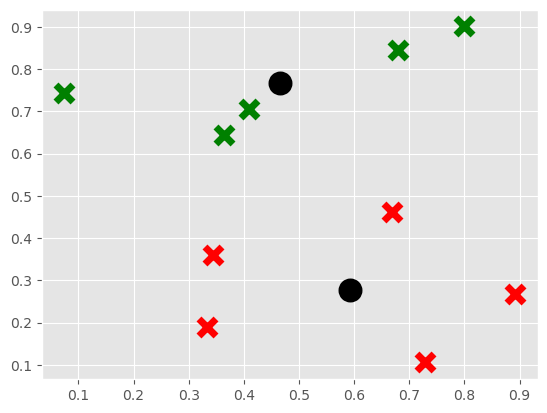

In [34]:
#boilerplate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# let us define the style of the plot here
style.use('ggplot')
colors = ["g","r","c","b"]

# sample data for this example
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
centroids = [np.array([0.46519213, 0.76779111]),np.array([0.59329188, 0.27671958])]
clusters = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# plot each point in the centroids array
for centroid in centroids:
    plt.scatter(centroid[0],centroid[1], marker="o", color="k", s=150, linewidths=5)

# plot each point in the points array, colored according to the cluster they belong
for i in range(len(clusters)):
    plt.scatter(p[i,0],p[i,1], marker="x", color=colors[clusters[i]], s=150, linewidths=5)

# plot all elements
plt.show()

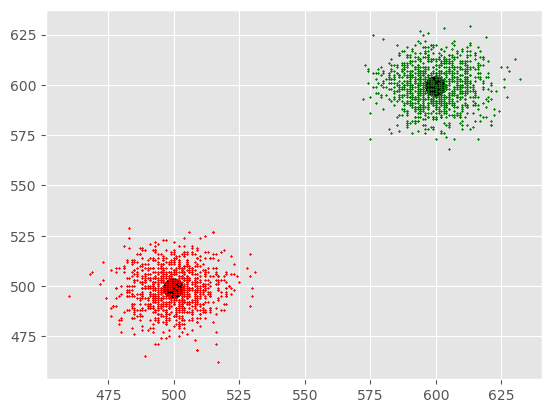

In [35]:
K = 2 # we want to divide our data into 2 clusters
#tol=0.00001 is the tolerance level for determining convergence. If the centroids' movement between iterations is less than this value, the algorithm stops, assuming it has converged.
clusters_result, centroids_result = kmeans(data_test, K=K, niter=500, tol=0.00001) ## Run the k-means algorithm on data_test with K clusters

#enumerate (centroids_result) is used to iterate over each centroid. i is the index, and centroid represents the centroid's coordinates.
for i, centroid in enumerate(centroids_result): #Plot each centroid position
    #centroid[0] and centroid[1] are the x and y coordinates of the centroid.
    #s=95 sets the size of the markers to 95.
    #linewidths=5 specifies the width of the boundary of the centroids.
    plt.scatter(centroid[0], centroid[1], marker="o", color="k", s=95, linewidths=5)

for i in range(len(clusters_result)): # Plot each data point
    #data_test[i, 0] and data_test[i, 1] are the x and y coordinates of each point
    #colors[clusters_result[i]] selects the appropriate color for each point based on its assigned cluster.
    plt.scatter(data_test[i, 0], data_test[i, 1], marker="x", color=colors[clusters_result[i]], s=1, linewidths=1)

plt.show()

### Step 8

Write a function <b>inertia</b> that takes three input arguments: $points$, $clusters$, and $centroids$.<br>
Where $points$ is an 2-dimensional ndarray with the coordinates of each point in your dataset, clusters is a vector that indicates the cluster of each point (takes values between $0$ and $K-1$), and $centroids$ is a 2-dimensional ndarray with length $k$ of the coordinates of the centroids.

The function should return a tuple in which the first value is the number of clusters and the second is the computed **average squared distance** of the points to the centroid of the cluster they are assigned.

**Test your function and report the results of using point=p, clusters=c, and centroids=cen. These are the quantities that you computed above in the different steps**

In [37]:
#It measures how well the points are clustered around their centroids.
def inertia(points, clusters, centroids):
    K = len(np.unique(clusters))  # This value represents how many clusters exist in the current clustering setup
    total_squared_distance = 0  # Initialize total squared distance to zero. It will accumulate the sum of squared distances from each data point to its respective centroid.

    # Calculate squared distance for each point to its assigned centroid
    for i, point in enumerate(points):
        
        #Retrieves the centroid that the point is assigned to using the clusters array, which contains the index of the centroid for each point.
        centroid = centroids[clusters[i]]
        
        #This calculates the squared distance between the point and its assigned centroid.
        total_squared_distance += np.linalg.norm(point - centroid) ** 2

    # Calculate average squared distance
    #This average squared distance is a measure of how tightly the data points are clustered around their respective centroids. 
    #A smaller value implies that the points are close to their centroids, indicating better clustering.
    avg_squared_distance = total_squared_distance / len(points)

    #The function returns a tuple with K representing the number of clusters and avg_squared_distance the computed average squared distance
    return K, avg_squared_distance



In [38]:
k_inertia, avg_sq_dist = inertia(p, c, cen)
print(f"Number of clusters: {k_inertia}")
print(f"Average Squared Distance to Centroids: {avg_sq_dist}")

Number of clusters: 3
Average Squared Distance to Centroids: 0.10954209828084607


### Step 9

Load the data from file https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1 into numpy array.<br>
The data consists of the coordinates of $N$ points in a 2-dimensional space. <br>
Use the functions <b>kmeans</b> and <b>internia</b> to identify the most suitable number of clusters. <br>
You might want to consider doing some visual inspection and reporting. <br>
For instance, inspect visually the dataset before performing the clustering; report the inertia values as a line plot; show the result of your clustering.

Tip: use the output of inertia to perform the elbow method https://en.wikipedia.org/wiki/Elbow_method_(clustering).

<img src="images/example_plot.png" alt="Alt text" width="700"/>

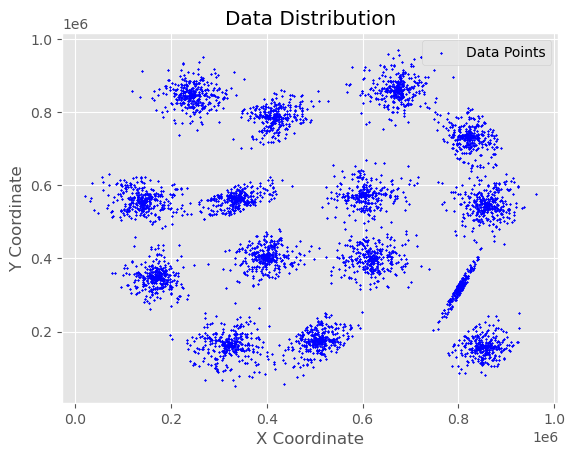

In [41]:
data = pd.read_csv("https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1", header=None).to_numpy()


 # Visualize the dataset before performing the clustering
plt.scatter(data[:, 0], data[:, 1], color='blue',marker="x", s=1, label='Data Points',linewidths=1)
plt.title("Data Distribution")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.show()

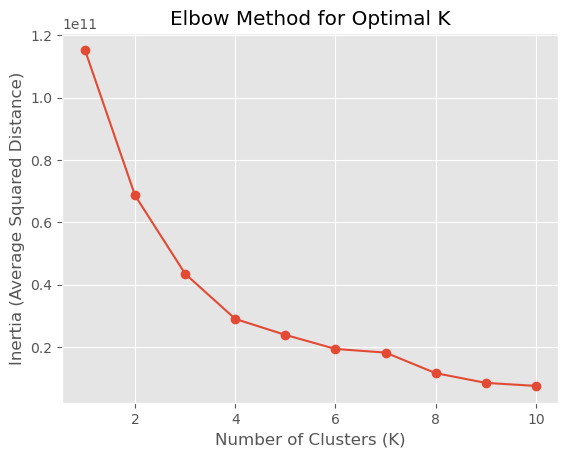

In [42]:

# We'll try different values of K to identify the best number of clusters using the elbow method
K_values = range(1, 11)  # K_values is a range object that iterates from 1 to 10

# Create an empty list to store the inertia values for each K
inertia_values = []

for K in K_values:
    # niter is set to 500 (max number of iterations), tol is set to 1e-5 (convergence threshold)
    clusters, centroids = kmeans(data, K=K, niter=500, tol=1e-5)
    # calculate inertia for the clustering (sum of squared distances of points to nearest centroid)
    #we use _ because the function inertia returns more than one value, but only the second one (avg_squared_distance) is of interest here.
    _, avg_squared_distance = inertia(data, clusters, centroids)
    # append the calculated inertia value to the list of inertia_values for each K
    inertia_values.append(avg_squared_distance)

# Step 3: plot the inertia values against the number of clusters (K) to determine the 'elbow'
plt.plot(K_values, inertia_values, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Average Squared Distance)")
plt.show()

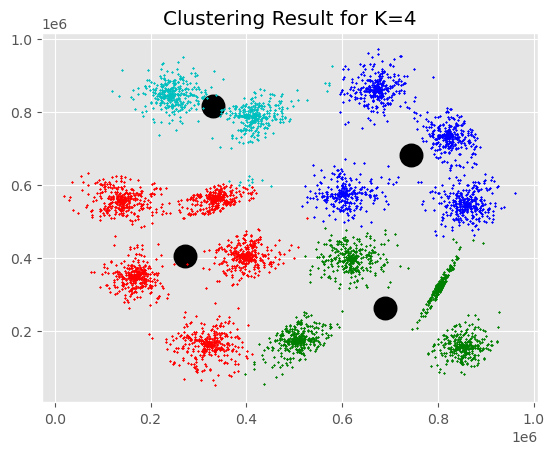

In [43]:
#we observe a "elbow" around K=4

optimal_K = 4  # Optimal K based on the elbow method

#This returns the assignments of each point to a cluster (clusters_optimal) and the coordinates of the centroids for the final clusters (centroids_optimal).
clusters_optimal, centroids_optimal = kmeans(data, K=optimal_K, niter=500, tol=1e-5)

# Run k-means clustering with K=4
style.use('ggplot')
colors = ["g", "r", "c", "b"]

#same plots as used in exercise 7

for i, centroid in enumerate(centroids_optimal):
    plt.scatter(centroid[0], centroid[1], marker="o", color="k", s=150, linewidths=5)

for i in range(len(clusters_optimal)):
    plt.scatter(data[i, 0], data[i, 1], marker="x", color=colors[clusters_optimal[i] % len(colors)], s=1,linewidths=1)

plt.title(f"Clustering Result for K={optimal_K}")
plt.show()